# Exploratory Data Analysis Allobank FAQ

## Import Library

In [26]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from langdetect import detect
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bardays\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## Load Data FAQ

In [2]:
# Load data FAQ
df = pd.read_csv('../Dataset/faq_allobank.csv').copy()
df.head()

,category,question,answer
0,UMUM,Apa itu Allo Bank?,Sebuah layanan perbankan berbasis digital yang...
1,UMUM,Kapan Allo Bank didirikan di Indonesia?,Allo Bank didirikan di Indonesia pada tahun 2021.
2,UMUM,Apakah Allo Bank terdaftar dan diawasi oleh Ot...,Benar! Allo Bank telah terdaftar dan diawasi o...
3,UMUM,Apakah menyimpan dana di Allo Bank dipastikan ...,Tentu saja! Allo Bank terdaftar sebagai pesert...
4,UMUM,Apakah Allo Bank memiliki kantor cabang?,"Saat ini, Allo Bank memiliki dua kantor cabang..."


## Data Analysis

In [3]:
# Display Column Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  369 non-null    object
 1   question  369 non-null    object
 2   answer    369 non-null    object
dtypes: object(3)
memory usage: 8.8+ KB


In [4]:
# Data FAQ Language Check
def detect_language(text):
    try:
        return detect(text)
    except:
        return None

df['question_language'] = df['question'].apply(detect_language)
df['answer_language'] = df['answer'].apply(detect_language)

df_en = df[df['question_language'] == 'en'].copy()

In [5]:
# Show data with english language
df_en

,category,question,answer,question_language,answer_language
200,LAYANAN,Apa itu Allo Grow?,Allo Grow adalah produk tabungan baru dari All...,en,id
208,LAYANAN,What is the difference between Allo Prime and ...,Allo Prime is an account that you can use for ...,en,en
210,LAYANAN,How much does it cost to save money in the All...,There are no administration fees to customers ...,en,en
211,LAYANAN,How much does it cost to save money in the All...,There are no administration fees to customers ...,en,en
213,LAYANAN,Is there a minimum balance to save money in Al...,"Yes, you can save money at Allo Grow starting ...",en,en
217,LAYANAN,Can I add funds to the savings that I had prev...,"Sorry, currently you are not able to add funds...",en,en
218,LAYANAN,Apa itu Instant Cash?,Instant Cash adalah produk pinjaman dana tunai...,en,id
220,LAYANAN,How to withdraw Instant Cash funds?,"To open an Allo Grow savings account, you can ...",en,en


In [8]:
# Drop data with english language
## Drop Index 208, 210, 211, 213, 217, 220
indices_to_drop = [208, 210, 211, 213, 217, 220]
df_lang_clean = df.drop(indices_to_drop).reset_index(drop=True)

In [ ]:
# Drop Language Detection Column
col_to_drop = ['question_language', 'answer_language']
df_lang_clean = df_lang_clean.drop(col_to_drop, axis=1)
df_lang_clean

,category,question,answer
0,UMUM,Apa itu Allo Bank?,Sebuah layanan perbankan berbasis digital yang...
1,UMUM,Kapan Allo Bank didirikan di Indonesia?,Allo Bank didirikan di Indonesia pada tahun 2021.
2,UMUM,Apakah Allo Bank terdaftar dan diawasi oleh Ot...,Benar! Allo Bank telah terdaftar dan diawasi o...
3,UMUM,Apakah menyimpan dana di Allo Bank dipastikan ...,Tentu saja! Allo Bank terdaftar sebagai pesert...
4,UMUM,Apakah Allo Bank memiliki kantor cabang?,"Saat ini, Allo Bank memiliki dua kantor cabang..."
...,...,...,...
358,REGISTRASI,Mengapa username dan Password saya diinfokan s...,Pastikan password yang dimasukkan sudah benar....
359,REGISTRASI,Apa yang harus saya lakukan apabila saya tidak...,Anda dapat menutup aplikasi Allo Bank dan memb...
360,REGISTRASI,Apa yang harus saya lakukan apabila saat Login...,Anda dapat menutup aplikasi Allo Bank dan memb...
361,REGISTRASI,Anda dapat menutup aplikasi Allo Bank dan memb...,Anda dapat menutup aplikasi Allo Bank dan memb...


In [10]:
# Data Duplicates Check for Question column
question_duplicates = df_lang_clean.duplicated(subset=["question"], keep=False).sum()
print(f"Duplikat pertanyaan: {question_duplicates}")

Duplikat pertanyaan: 22


In [11]:
# Show Duplicate Question
df_lang_clean[df_lang_clean.duplicated(subset=["question"], keep=False)]

,category,question,answer
64,AKUN,Di mana saya bisa menemukan file e-statement s...,Anda bisa mendapatkan file e-statement pada ta...
65,AKUN,Di mana saya bisa menemukan file e-statement s...,Anda bisa mendapatkan file e-statement pada ta...
139,LAYANAN,Apa itu Allo Pay?,Allo Pay adalah produk uang elektronik jenis u...
140,LAYANAN,Apa itu Allo Pay?,Allo Pay adalah produk uang elektronik jenis u...
153,LAYANAN,Bagaimana jika KTP saya sudah menggunakan KTP ...,Saat ini Allo Bank belum mendukung registrasi ...
154,LAYANAN,Bagaimana jika KTP saya sudah menggunakan KTP ...,Saat ini Allo Bank belum mendukung registrasi ...
187,LAYANAN,Bagaimana caranya jika saya ingin membatalkan ...,Setelah Anda mengkonfirmasi persetujuan pengaj...
195,LAYANAN,Jika tanggal jatuh tempo jatuh pada hari libur...,"Ya, Anda tetap bisa melakukan pembayaran meski..."
196,LAYANAN,Apakah saya akan mendapatkan notifikasi pada s...,Anda akan mendapatkan notifikasi sejak H-1 dan...
197,LAYANAN,Apakah saya dapat mengajukan lebih dari 1 (sat...,"Ya, Anda dapat melakukan pengajuan lebih dari ..."


In [12]:
# Drop Duplicate
df_clean = df_lang_clean.drop_duplicates(subset=["question"])
df_clean[df_clean.duplicated(subset=["question"], keep=False)]

,category,question,answer


In [13]:
# Data Duplicates Check for Answer column
answer_duplicates = df_clean.duplicated(subset=["answer"]).sum()
print(f"Duplikat jawaban: {answer_duplicates}")

Duplikat jawaban: 20


In [14]:
# Show Duplicate Answer
df_clean[df_clean.duplicated(subset=["answer"], keep=False)]

,category,question,answer
67,AKUN,Apa yang harus saya lakukan jika saya lupa nom...,"Tidak perlu khawatir, Anda dapat menghubungi A..."
72,AKUN,Apa yang harus saya lakukan ketika saya tetap ...,"Tidak perlu khawatir, Anda dapat menghubungi A..."
88,AKUN,Apakah saya bisa mengajukan pembukaan blokir a...,"Tidak perlu khawatir, Anda dapat menghubungi A..."
89,AKUN,Apakah ada syarat dan ketentuan untuk mengajuk...,"Tidak perlu khawatir, Anda dapat menghubungi A..."
90,AKUN,Apa saja dokumen pendukung yang dibutuhkan unt...,"Tidak perlu khawatir, Anda dapat menghubungi A..."
96,PRODUK,Mengapa saya tidak bisa menggunakan Allo Pay s...,Mungkin Kamu telah melebihi batas pembayaran p...
97,PRODUK,Mengapa saya tidak bisa menggunakan Allo Pay+ ...,Mungkin Kamu telah melebihi batas pembayaran p...
164,LAYANAN,Berapa suku bunga yang akan saya dapat dengan ...,Anda dapat melihat detail terkait suku bunga y...
165,LAYANAN,Bagaimana perhitungan bunga di Allo Prime?,Anda dapat melihat detail terkait suku bunga y...
166,LAYANAN,Apa yang harus saya lakukan jika wajah saya ti...,Anda dapat mencoba lagi dan pastikan bahwa And...


In [16]:
# Add column character length for analysis
df_clean["question_len"] = df_clean["question"].apply(len)
df_clean["answer_len"] = df_clean["answer"].apply(len)

C:\Users\Bardays\AppData\Local\Temp\ipykernel_6232\86388867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["question_len"] = df_clean["question"].apply(len)
C:\Users\Bardays\AppData\Local\Temp\ipykernel_6232\86388867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["answer_len"] = df_clean["answer"].apply(len)


In [17]:
# Statistic Overview
df_clean.describe()

,question_len,answer_len
count,352.000000,352.000000
mean,69.215909,250.937500
std,24.848234,226.603653
min,13.000000,49.000000
25%,53.000000,111.000000
50%,67.000000,195.500000
75%,83.000000,301.500000
max,172.000000,2438.000000


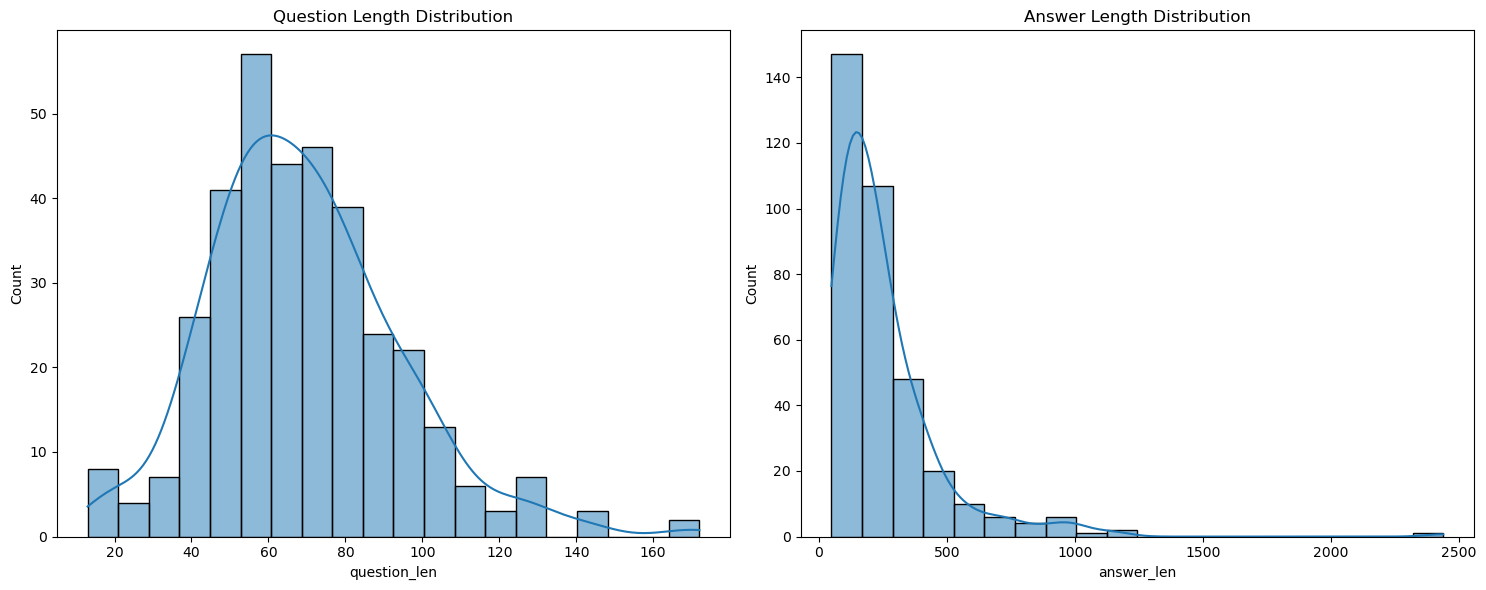

In [ ]:
# Create Histogram for Q&A length distribution
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df_clean['question_len'], bins=20, ax=axs[0], kde=True)
axs[0].set_title("Question Length Distribution")
sns.histplot(df_clean['answer_len'], bins=20, ax=axs[1], kde=True)
axs[1].set_title("Answer Length Distribution")
plt.tight_layout()
plt.show()

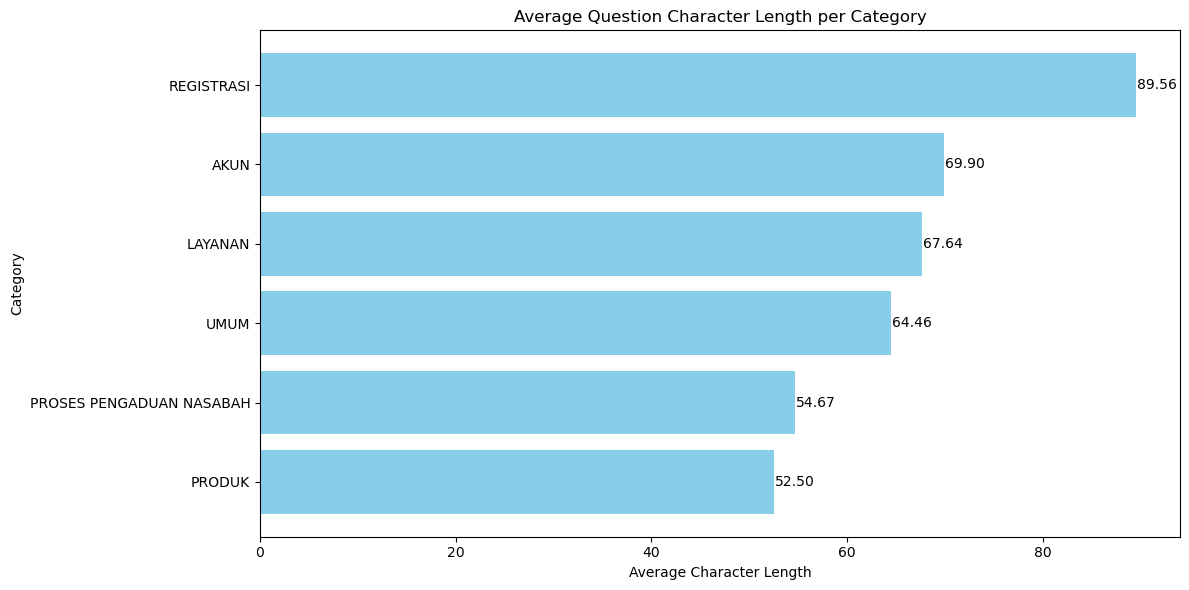

In [18]:
# Average character length for question per category
avg_cl_q = df_clean.groupby('category')['question_len'].mean().reset_index()

# Sort by question_len in descending order
avg_cl_q = avg_cl_q.sort_values('question_len', ascending=True)

# Create horizontal bar plot
plt.figure(figsize=(12, 6))
bars = plt.barh(avg_cl_q['category'], avg_cl_q['question_len'], color='skyblue')
plt.title('Average Question Character Length per Category')
plt.ylabel('Category')
plt.xlabel('Average Character Length')

# Add text labels on each bar
for i, bar in enumerate(bars):
    x = bar.get_width()  # Length of the bar (average character length)
    y = bar.get_y() + bar.get_height() / 2  # Center vertically
    plt.text(x + 0.1, y, f'{x:.2f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

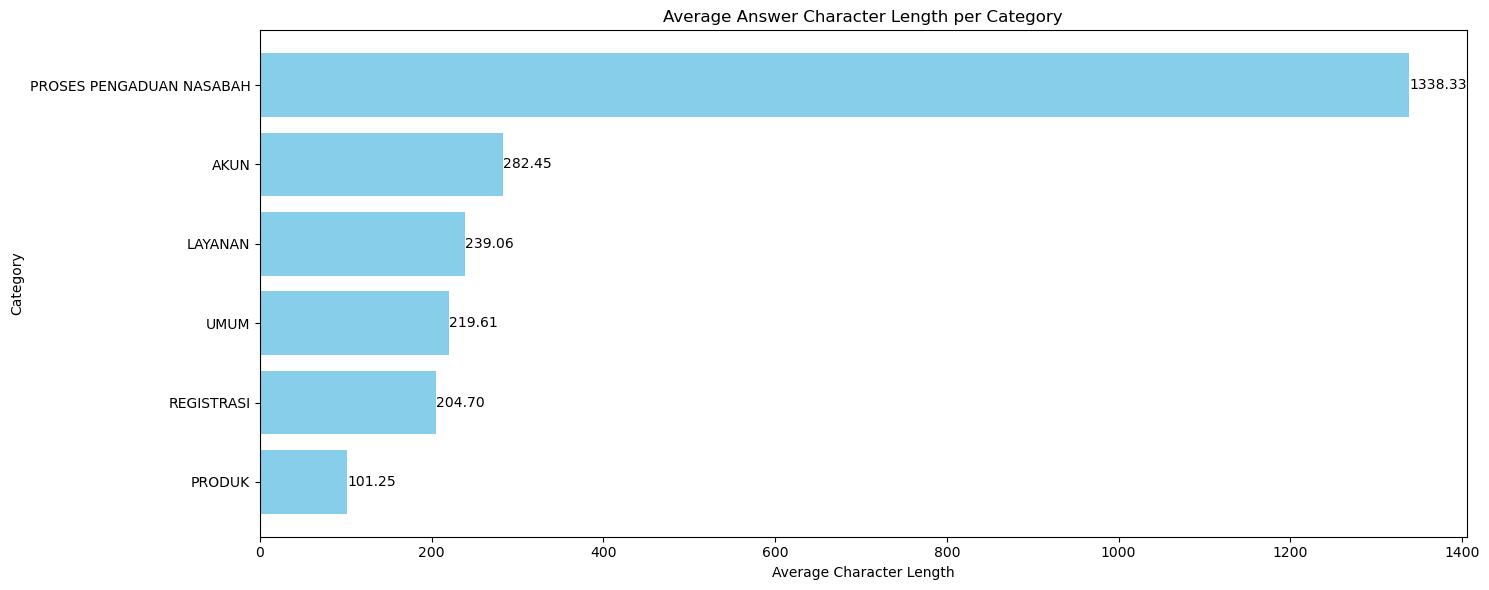

In [19]:
# Average character length for answer per category
avg_cl_a = df_clean.groupby('category')['answer_len'].mean().reset_index()

# Sort by answer_len in descending order
avg_cl_a = avg_cl_a.sort_values('answer_len', ascending=True)

# Create horizontal bar plot
plt.figure(figsize=(15, 6))
bars = plt.barh(avg_cl_a['category'], avg_cl_a['answer_len'], color='skyblue')
plt.title('Average Answer Character Length per Category')
plt.ylabel('Category')
plt.xlabel('Average Character Length')

# Add text labels on each bar
for i, bar in enumerate(bars):
    x = bar.get_width()  # Length of the bar (average character length)
    y = bar.get_y() + bar.get_height() / 2  # Center vertically
    plt.text(x + 0.1, y, f'{x:.2f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


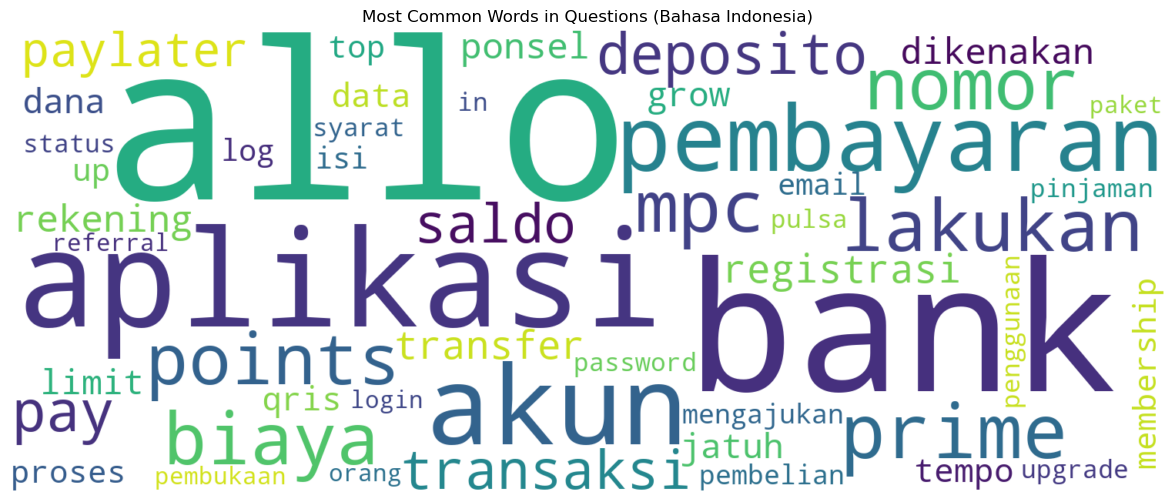

In [ ]:
# List stopwords bahasa Indonesia from NLTK
indonesian_stopwords = stopwords.words('indonesian')

# Initialization CountVectorizer with stopwords bahasa Indonesia
vectorizer = CountVectorizer(stop_words=indonesian_stopwords, max_features=50)
X = vectorizer.fit_transform(df_clean['question'])
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

# Create WordCloud
wordcloud = WordCloud(width=1500, height=600, background_color='white').generate_from_frequencies(word_freq)

# Display WordCloud
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Questions (Bahasa Indonesia)")
plt.show()